In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, GlobalAveragePooling1D, LSTM, SimpleRNN
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
train_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
valid_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv")

# Separate input strings and labels
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].astype(int).tolist()
valid_seq_X = valid_seq_df['input_str'].tolist()
valid_seq_Y = valid_seq_df['label'].astype(int).tolist()

In [3]:
# Function to encode sequences of digits (0-9) into integers
def label_encode_sequences(sequences):
    return np.array([[int(digit) for digit in seq] for seq in sequences])

# Encode training and validation sequences
train_seq_X_encoded = label_encode_sequences(train_seq_X)
valid_seq_X_encoded = label_encode_sequences(valid_seq_X)

# Hyperparameters
max_length = 50  # The length of the input sequences (50 digits)
vocab_size = 10  # Digits from 0 to 9
embedding_dim = 16  # Dimension of the embedding layer
n_classes = 2  # Number of classes (binary classification)

In [4]:
def build_embedding_model():
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(GlobalAveragePooling1D())
    return model

def build_cnn_model():
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    return model

def build_rnn_model():
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(SimpleRNN(64))
    return model

def build_lstm_model():
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(LSTM(64))
    return model

In [5]:
def train_and_evaluate_lr(train_X, train_Y, valid_X, valid_Y, model_builder, percentages):
    accuracies = []
    
    for p in percentages:
        n_samples = int(len(train_X) * p)
        
        # Subset of training data
        train_X_subset = train_X[:n_samples]
        train_Y_subset = train_Y[:n_samples]
        
        # Build the encoding model (embedding, CNN, RNN, etc.)
        encoding_model = model_builder()
        
        # Fit the model to get embeddings
        embeddings_train = encoding_model.predict(train_X_subset)
        embeddings_valid = encoding_model.predict(valid_X)

        # Use Logistic Regression for classification
        lr_classifier = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
        lr_classifier.fit(embeddings_train, train_Y_subset)
        
        # Predict on validation set
        y_pred = lr_classifier.predict(embeddings_valid)

        # Calculate accuracy
        accuracy = accuracy_score(valid_Y, y_pred)
        accuracies.append(accuracy)
        
    return percentages, accuracies

In [6]:
def plot_accuracies(percentages, accuracies_dict, title):
    plt.figure(figsize=(10, 6))
    for label, accuracies in accuracies_dict.items():
        plt.plot([int(p * 100) for p in percentages], accuracies, marker='o', linestyle='--', label=label)
    plt.xlabel("Percentage of Training Data (%)")
    plt.ylabel("Validation Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


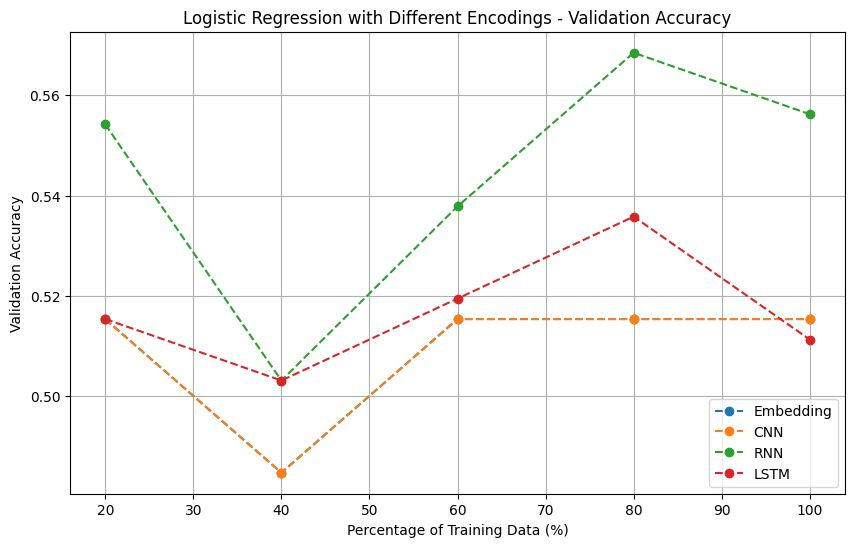

In [7]:
# Hyperparameters for training
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# Dictionary to store accuracies for different encoding methods
accuracies_dict = {}

# Train and evaluate models with different encodings
encodings = {
    "Embedding": build_embedding_model,
    "CNN": build_cnn_model,
    "RNN": build_rnn_model,
    "LSTM": build_lstm_model
}

for encoding_name, model_builder in encodings.items():
    percentages, accuracies = train_and_evaluate_lr(train_seq_X_encoded, train_seq_Y, valid_seq_X_encoded, valid_seq_Y, model_builder, percentages)
    accuracies_dict[encoding_name] = accuracies

# Plot the accuracies for different encoding methods
plot_accuracies(percentages, accuracies_dict, "Logistic Regression with Different Encodings - Validation Accuracy")